In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots as sp

In [123]:
# Read in Excel File
df = pd.read_excel('Roof_area_summary.xlsx', engine='openpyxl')
print(df.head())

                Borough  1-1.99 m2  2-10 m2  11-40 m2  > 40 m2
0        City of London      11711    26150     35608   155187
1  Barking and Dagenham      39407    98365     72750   526976
2                Barnet      84085   193808    170689   564689
3                Bexley      65667   149936    118410   550363
4                 Brent      69775   165174    146160   678154


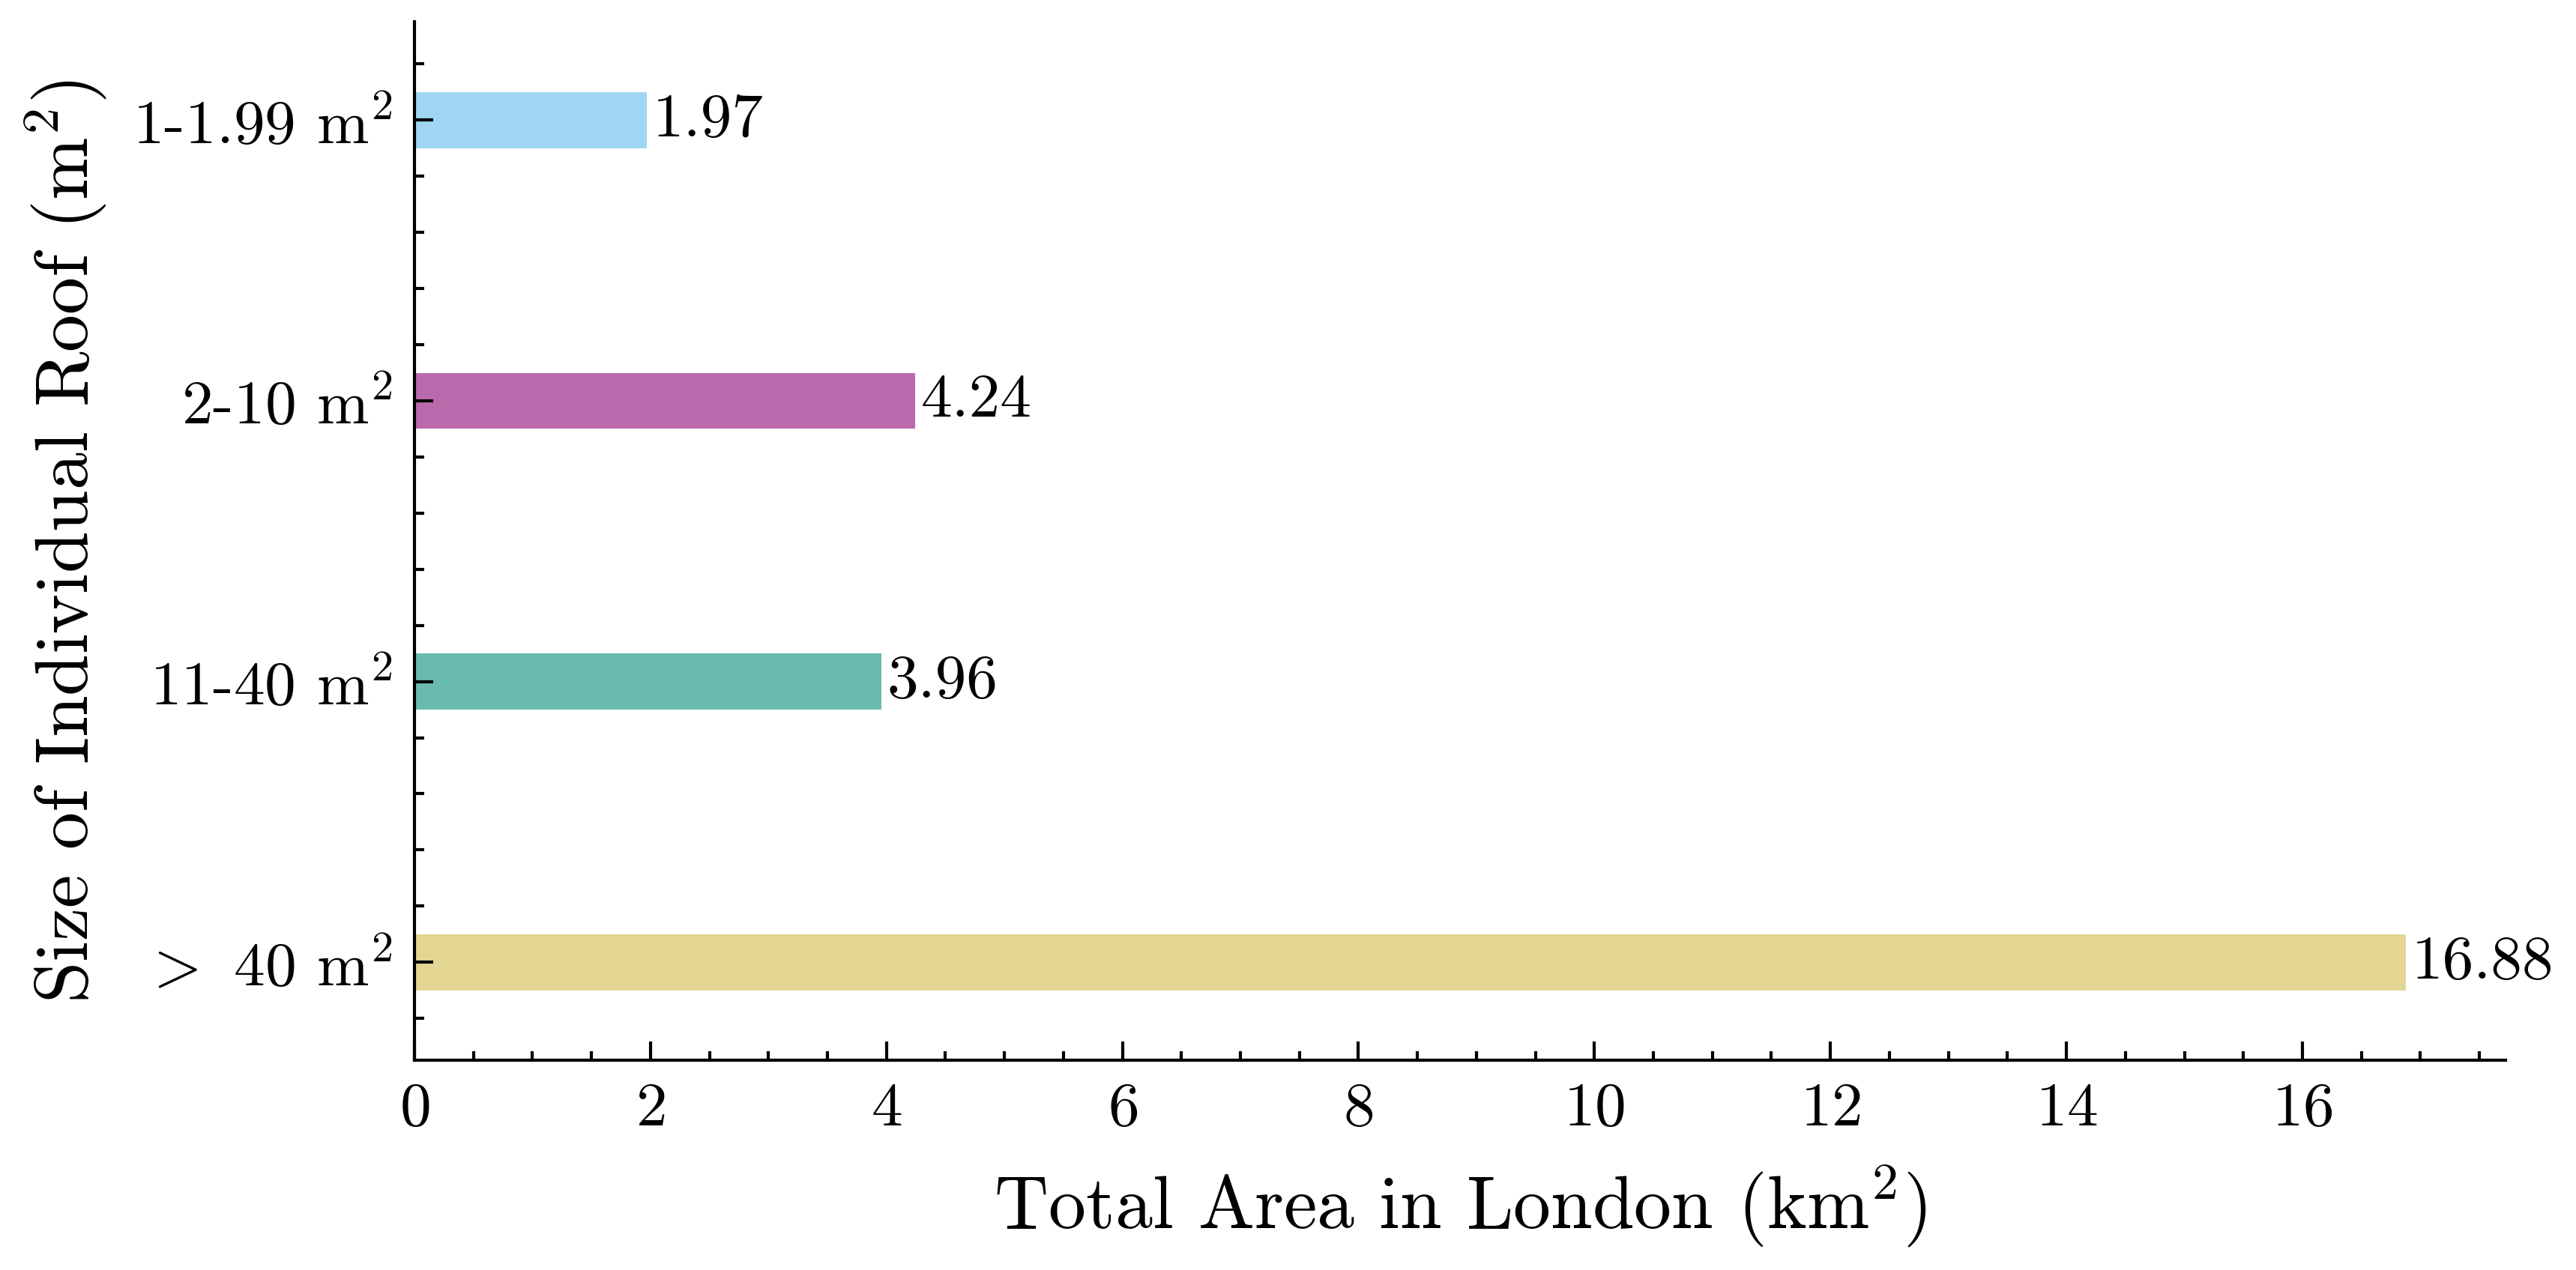

In [3]:
%config InlineBackend.figure_format = 'retina'

# Read in Excel File
df = pd.read_excel('Roof_area_summary.xlsx', engine='openpyxl')

# Use the scienceplot style with 'muted' and without LaTeX
plt.style.use(['science', 'muted', 'no-latex'])

# Create a figure and a set of subplots
fig, axes = plt.subplots(figsize=(6,3), dpi=300)

# Get the current colour cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Add alpha to the colors
colors = [color_cycle[4], color_cycle[8], color_cycle[6], color_cycle[2]]

# Plot Total
data = df[['1-1.99 m2', '2-10 m2', '11-40 m2', '> 40 m2']]
data = df[['1-1.99 m2', '2-10 m2', '11-40 m2', '> 40 m2']] / 1e6
bars = data.sum().plot(kind='barh', color=colors,  width=0.2, alpha = 0.8)

# Invert the y-axis
axes.invert_yaxis()

axes.set_ylabel('Size of Individual Roof (m$^2$)', fontsize = 12)
axes.set_xlabel('Total Area in London (km$^2$)', fontsize = 12)


# Adding labels to the side of each bar in the horizontal graph
for bar in bars.patches:
    x_val = bar.get_width()
    axes.text(x_val + 0.05, bar.get_y() + bar.get_height()/2, round(x_val, 2), ha='left', va='center')

# Tick
current_yticks = axes.get_yticks()
new_yticklabels = ['1-1.99 m$^2$', '2-10 m$^2$', '11-40 m$^2$', '$>$ 40 m$^2$']  
axes.set_yticks(current_yticks)
axes.set_yticklabels(new_yticklabels)
axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)

# only show x and y axis
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.tick_params(top=False, right=False)
axes.tick_params(top=False, right=False, which='minor')

fig.savefig("horizontal_output_roof_total.svg", bbox_inches='tight')

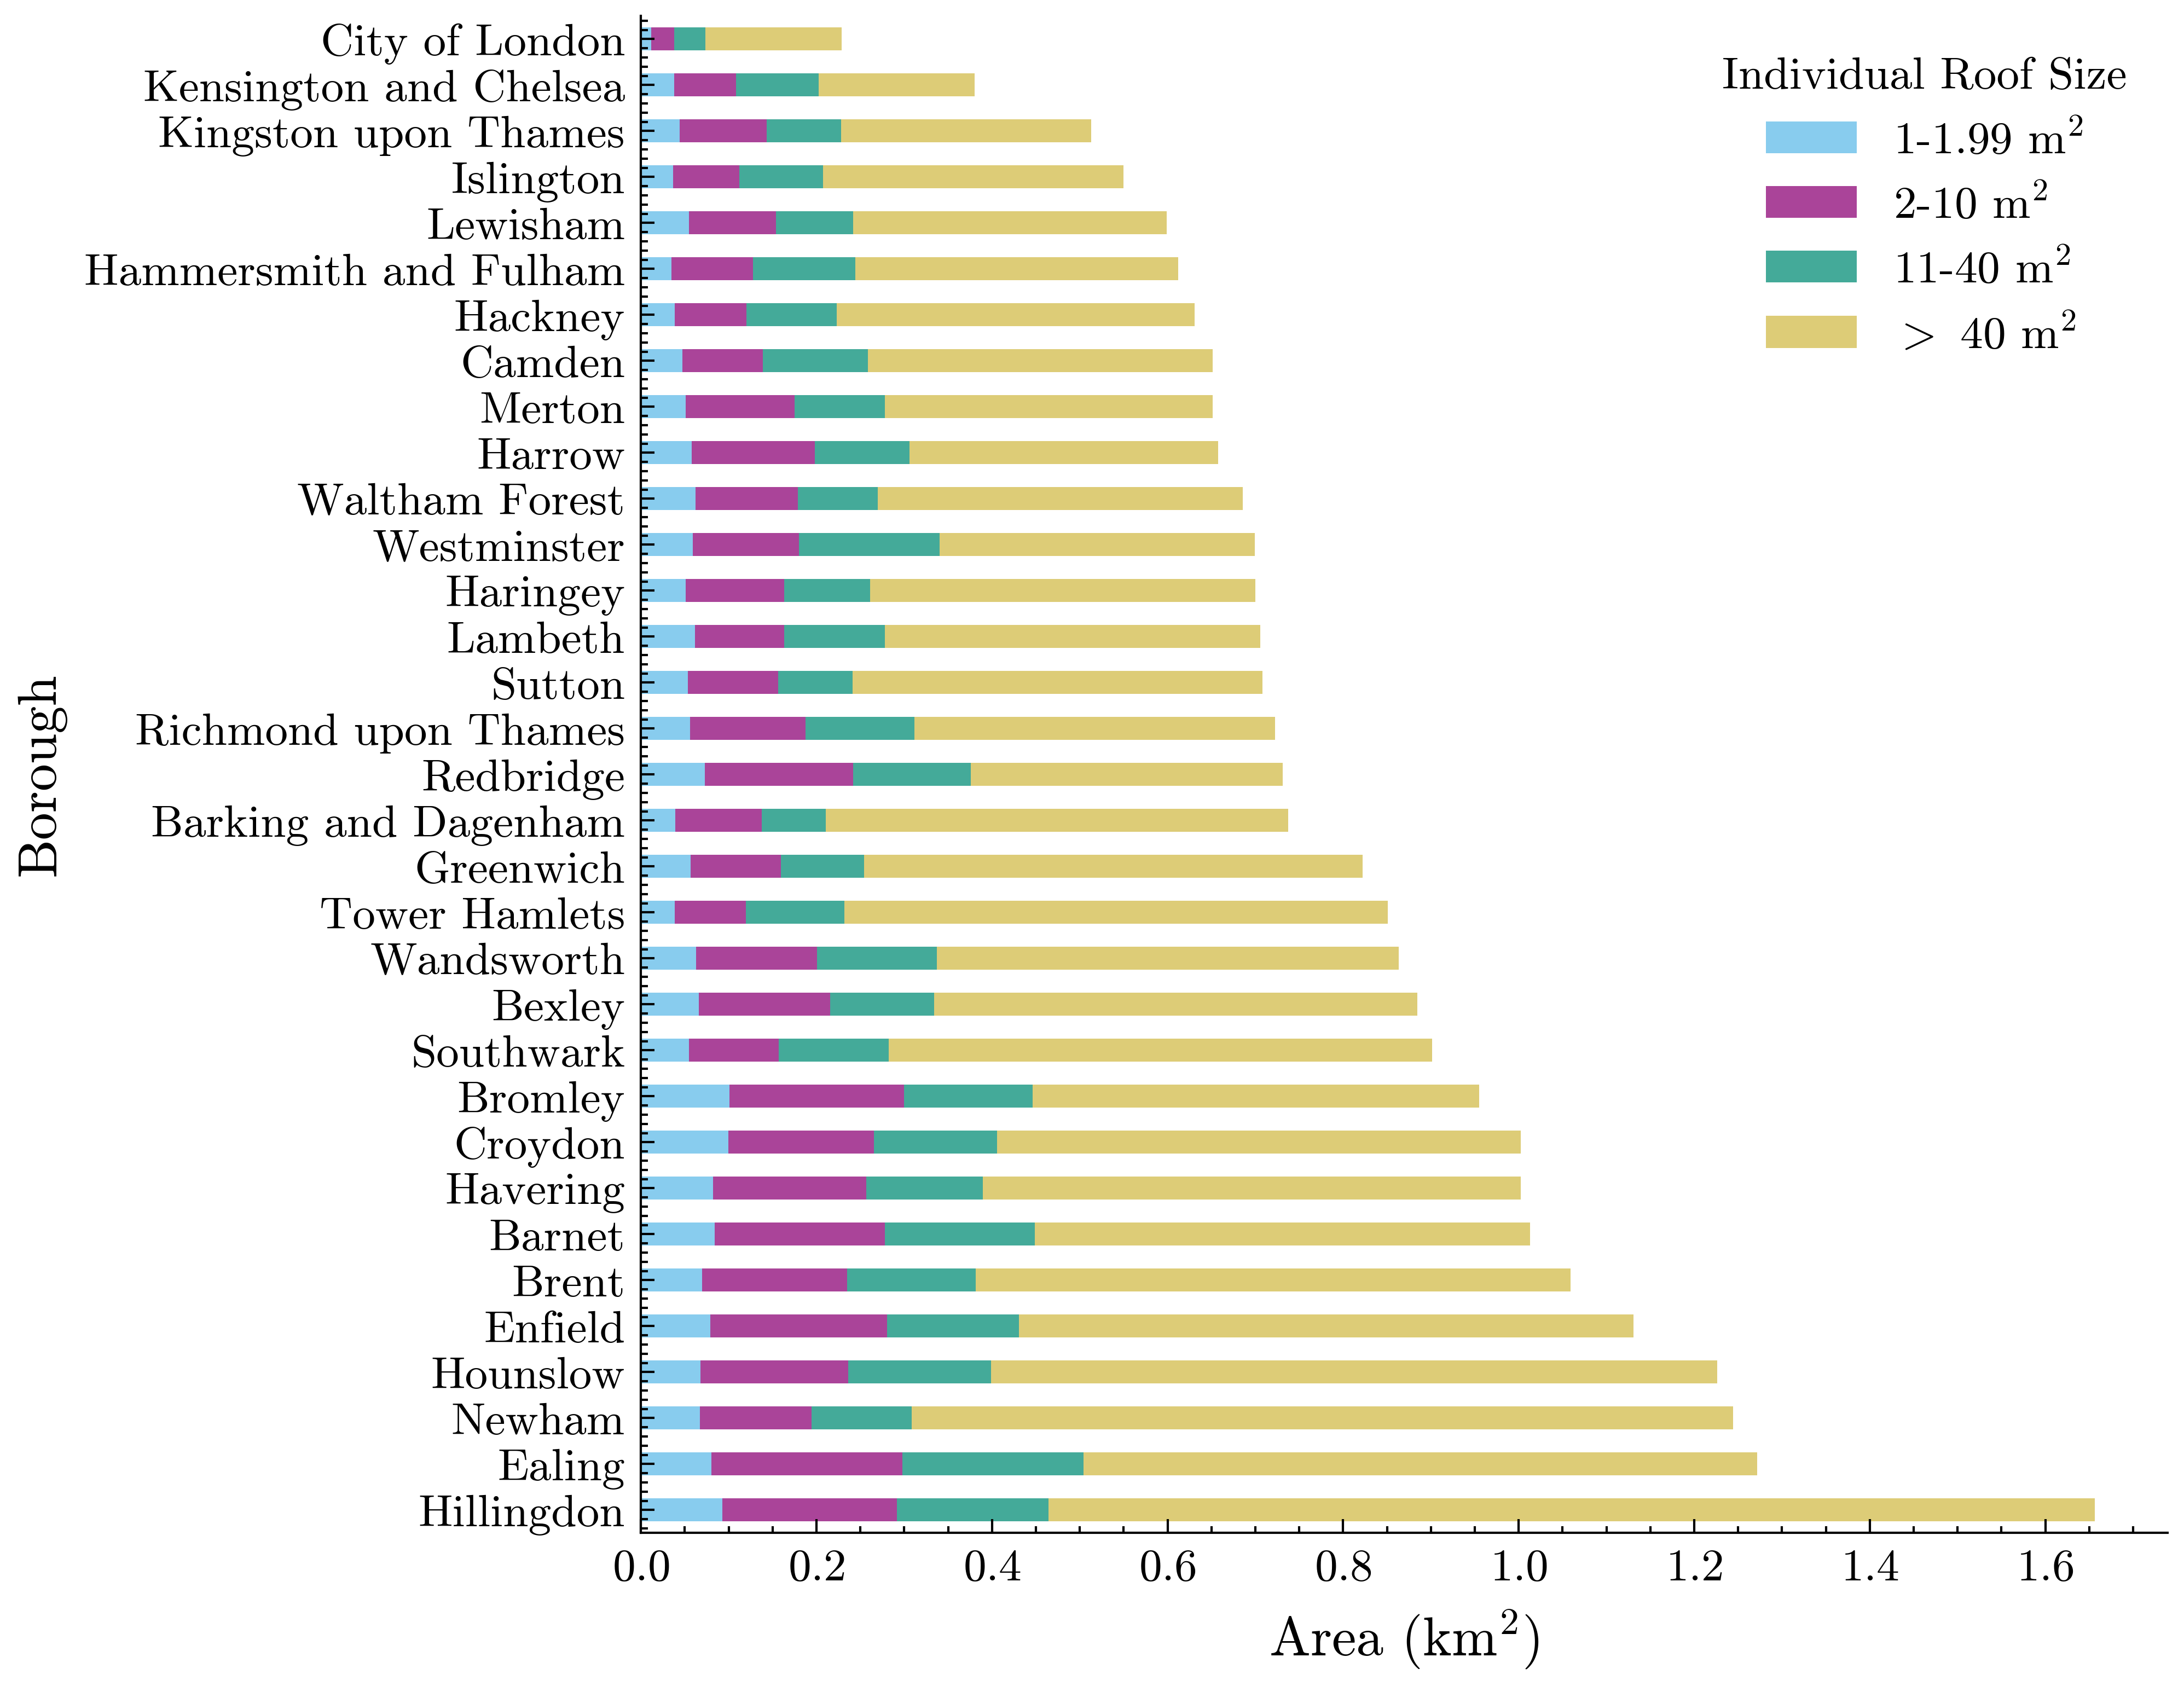

In [3]:
%config InlineBackend.figure_format = 'retina'

# Read in Excel File
df = pd.read_excel('Roof_area_summary.xlsx', engine='openpyxl')

# Use the scienceplot style with 'muted' and without LaTeX
plt.style.use(['science', 'muted', 'no-latex'])

# Get the current colour cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Add alpha to the colors
colors = [color_cycle[4], color_cycle[8], color_cycle[6], color_cycle[2]]

# Convert areas from m2 to km2
area_columns = ['1-1.99 m2', '2-10 m2', '11-40 m2', '> 40 m2']
for col in area_columns:
    df[col] = df[col] / 1000000  # Convert to km^2

# Plotting the stacked bar chart with specified colors
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
df.set_index('Borough').plot(kind='barh', stacked=True, color=colors, ax=ax)

# Invert the y-axis
ax.invert_yaxis()

# x,y-aixs label
ax.set_xlabel('Area (km$^2$)', fontsize = 12)
ax.set_ylabel('Borough', fontsize = 12)

# Tick
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Legend
# Renaming legend entries
new_labels = ['1-1.99 m$^2$', '2-10 m$^2$', '11-40 m$^2$', '$>$ 40 m$^2$']
# Customizing the legend
ax.legend(new_labels, fontsize='medium', title='Individual Roof Size', title_fontsize = 'medium')  # Change 'upper right' to your desired location

# only show x and y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(top=False, right=False)
ax.tick_params(top=False, right=False, which='minor')

plt.savefig("horizontal_output_roof_borough.svg", bbox_inches='tight')

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Read in Excel File
df = pd.read_excel('Roof_area_summary.xlsx', engine='openpyxl')

# Use the scienceplot style with 'muted' and without LaTeX
plt.style.use(['science', 'muted', 'no-latex'])

# Create a figure and set up a 2x1 grid for vertical arrangement
fig = plt.figure(figsize=(8, 10), dpi=500)
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4])

# Get the current colour cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [color_cycle[4], color_cycle[8], color_cycle[6], color_cycle[2]]

# First Plot
ax1 = fig.add_subplot(gs[0])

data = df[['1-1.99 m2', '2-10 m2', '11-40 m2', '> 40 m2']] / 1e6
bars = data.sum().plot(kind='barh', color=colors, width=0.5, alpha=0.8, ax=ax1)  # Increased width to 0.4 for thicker bars

# Customization for the first plot
ax1.invert_yaxis()
ax1.set_ylabel('Size of Individual Roof (m$^2$)', fontsize=14)
ax1.set_xlabel('Total Area in London (km$^2$)', fontsize=14)

for bar in bars.patches:
    x_val = bar.get_width()
    ax1.text(x_val + 0.05, bar.get_y() + bar.get_height()/2, round(x_val, 2), ha='left', va='center')

new_yticklabels = ['1-1.99 m$^2$', '2-10 m$^2$', '11-40 m$^2$', '$>$ 40 m$^2$']
ax1.set_yticklabels(new_yticklabels)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(top=False, right=False)
ax1.tick_params(top=False, right=False, which='minor')

# Add annotation "(a)" to the first plot
ax1.annotate("(A)", xy=(-0.05, 1.2), xycoords="axes fraction", fontsize=16, weight="bold")

# Second Plot
ax2 = fig.add_subplot(gs[1])

# Convert areas from m2 to km2
area_columns = ['1-1.99 m2', '2-10 m2', '11-40 m2', '> 40 m2']
for col in area_columns:
    df[col] = df[col] / 1000000  # Convert to km^2

# Reversing the order of data for the bottom graph
df = df[::-1]

df.set_index('Borough').plot(kind='barh', stacked=True, color=colors, ax=ax2, width=0.4)  # Decreased width to 0.2 for thinner bars

# Customization for the second plot
ax2.set_xlabel('Area (km$^2$)', fontsize=14)
ax2.set_ylabel('Borough', fontsize=14)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
new_labels = ['1-1.99 m$^2$', '2-10 m$^2$', '11-40 m$^2$', '$>$ 40 m$^2$']
ax2.legend(new_labels, fontsize='medium', title='Individual Roof Size', title_fontsize='medium')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(top=False, right=False)
ax2.tick_params(top=False, right=False, which='minor')

# Add annotation "(b)" to the second plot
ax2.annotate("(B)", xy=(-0.05, 1.05), xycoords="axes fraction", fontsize=16, weight="bold") 

# Adjust layout
fig.tight_layout(h_pad=3)
fig.savefig("combined_vertical_output.svg", bbox_inches='tight')
